# Connect to G-Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
file_dir = '/content/drive/MyDrive/DS_PROJECT_PORTFOLIO/DS_PROJECT5_UNSUPERVISEDCLUSTERING'
os.chdir(file_dir)

In [3]:
!ls

'Online Retail.xlsx'  '[Sandbox] Customer Segmentation.ipynb'


# Import Libraries

In [4]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set_style('whitegrid')

# Data Preprocessing
from sklearn.preprocessing import(
     StandardScaler
)

# Modelling
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Package imports
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Import Dataframe

In [5]:
df = pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Data Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.isna().sum()[df.isna().sum() > 0]

Description      1454
CustomerID     135080
dtype: int64

In [8]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


The data contains 541909 rows and 8 columns, each row represents each item in a purchasement. The columns are:
* `InvoiceNo` - Invoice number, to identify each invoice
* `StockCode` - Stock code, to identify each item in the inventory
* `Description` - Item's description
* `Quantity` - Number of purchased item in each invoice
* `InvoiceDate` - Date of purchasement
* `UnitPrice` - Item's price per unit
* `CustomerID` - Customer's identification number
* `Country` - Customer's country of origin

# Data Preprocessing

## Handling Missing Values

### Check Missing Values

In [9]:
# Columns that has null values
df.isna().sum()[df.isna().sum() > 0]

Description      1454
CustomerID     135080
dtype: int64

In [10]:
# Percantage null values in every columns
columns_with_missing_values = df.isna().sum()[df.isna().sum() > 0]
print(f"The percentage of missing values in 'Description' Columns: {(columns_with_missing_values[0]/len(df))*100}\n")

columns_with_missing_values = df.isna().sum()[df.isna().sum() > 0]
print(f"The percentage of missing values in 'CustomerID' Columns: {(columns_with_missing_values[1]/len(df))*100}")

The percentage of missing values in 'Description' Columns: 0.2683107311375157

The percentage of missing values in 'CustomerID' Columns: 24.926694334288598


### Remove Missing Values

In [11]:
# Save Data With Missing Values
df_with_missing_values = df.loc[df['CustomerID'].isna()]

In [12]:
# --- Use this for specific columns ---
df = df[(df['CustomerID'].notna()) & (df['Description'].notna())]

# --- Or use this for removing nan value in every columns ---
# df.dropna()

In [13]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## Check Anomaly Data

In [14]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


from df.describe() we have 2 anomaly, which is:
- Quantity: Has minus value in minimal value.
- UnitPrice: the minimal values is zero.

### Handling Quantity Anomaly

In [15]:
df.loc[df['Quantity'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [16]:
df = df.loc[df['Quantity'] > 0]

### Handling UnitPrice Anomaly

In [17]:
df.loc[df['UnitPrice'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom


In [18]:
df = df.loc[df['UnitPrice'] > 0]

## Country Columns Analysis

In [19]:
# Check unique value
df[['InvoiceNo', 'StockCode', 'CustomerID', 'Country']].nunique()

InvoiceNo     18532
StockCode      3665
CustomerID     4338
Country          37
dtype: int64

There are 18532 purchasements, 3665 unique item purchased, from 4338 customers that came from 37 countries.

As we seen above, there are 37 countries of customer's origin. Since the retail company is based in the UK, we could simplified the country as UK or Non UK

In [20]:
df['Country_isUK'] = np.where(df['Country'] == 'United Kingdom', 'UK', 'Non UK')

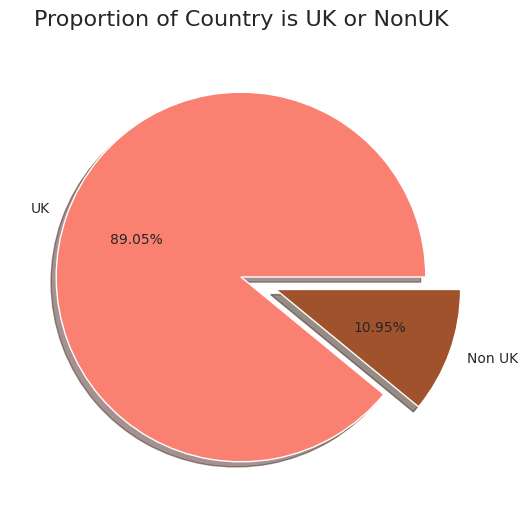

In [21]:
proportion= df['Country_isUK'].value_counts()
labels= df['Country_isUK'].value_counts().index
myexplode= [0, 0.2]

fig, ax= plt.subplots(figsize=(10,6))
plt.title(
    'Proportion of Country is UK or NonUK',
    fontdict={"fontsize":16},
    pad= 15
)

ax= (
    plt.pie(
        proportion,
        labels=labels,
        explode = myexplode,
        shadow=True,
        autopct= '%1.2f%%',
        colors=[
            'Salmon',
            'Sienna'
        ]

    )
)

Based on the piechart, we could see that mostly our customers are from the UK.

## New Column - Total Amount

Next, we could analyze the trend of purchasement. First, lets create `TotalAmount` column (`Quantity` * `UnitPrice`). Then, we could transform the `InvoiceDate` data type from string to date.

In [22]:
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# Analysis of Purchasements

In [23]:
def plotPurchasementTrend(frequency=str, linetitle=str):
    weekly_purchasements= df.copy()
    weekly_purchasements= weekly_purchasements.groupby(
        by= pd.Grouper(key='InvoiceDate', freq=frequency))['TotalAmount'].sum()

    fig, ax= plt.subplots(figsize=(20, 7))
    plt.title(
        linetitle,
        fontdict= {'fontsize':16},
        pad=20
    )

    ax= (
        sns.lineplot(
            weekly_purchasements,
            marker= '*',
            markersize= 10,
            markerfacecolor= 'red'
        ),
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1)),
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
    )

## Weekly Trend Purchasements

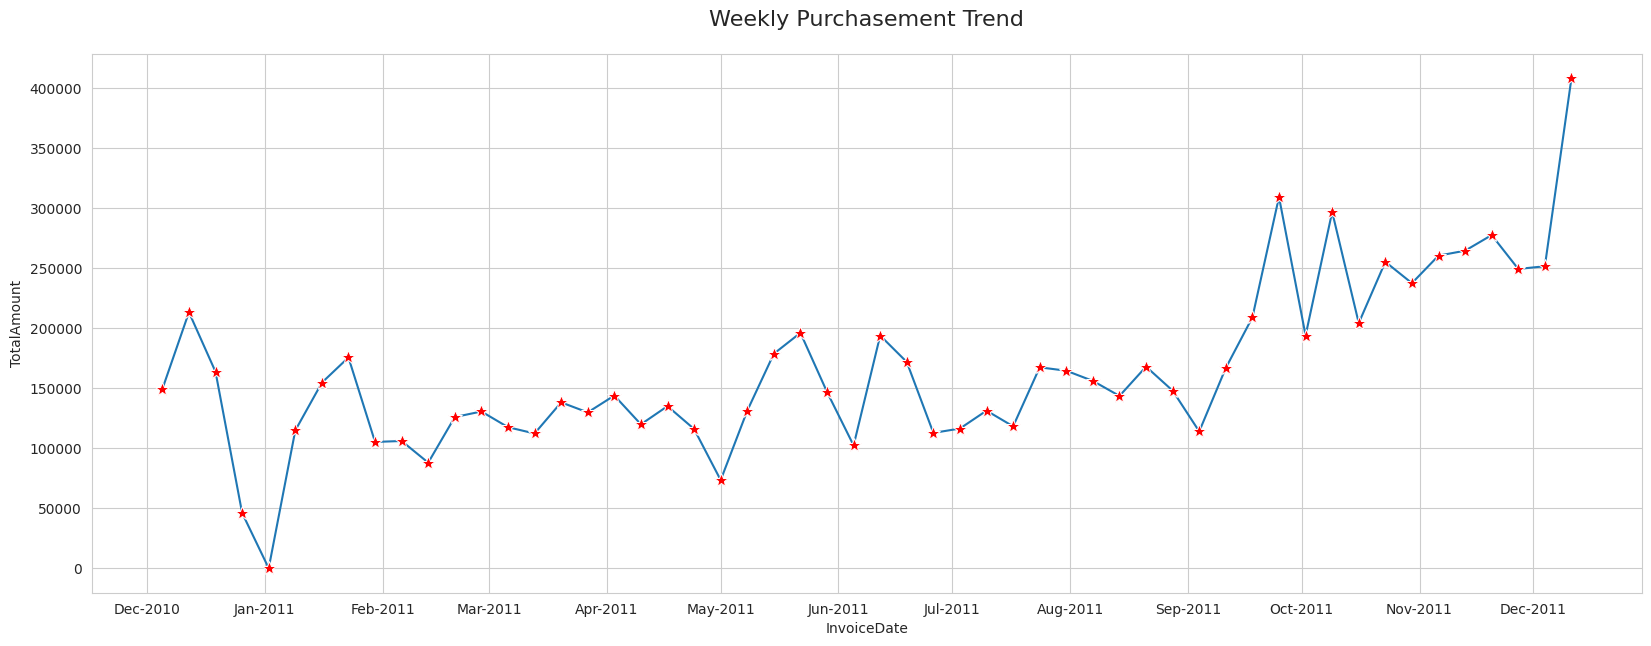

In [24]:
plotPurchasementTrend(frequency= '1W', linetitle='Weekly Purchasement Trend')

## Monthly Trend Purchasements

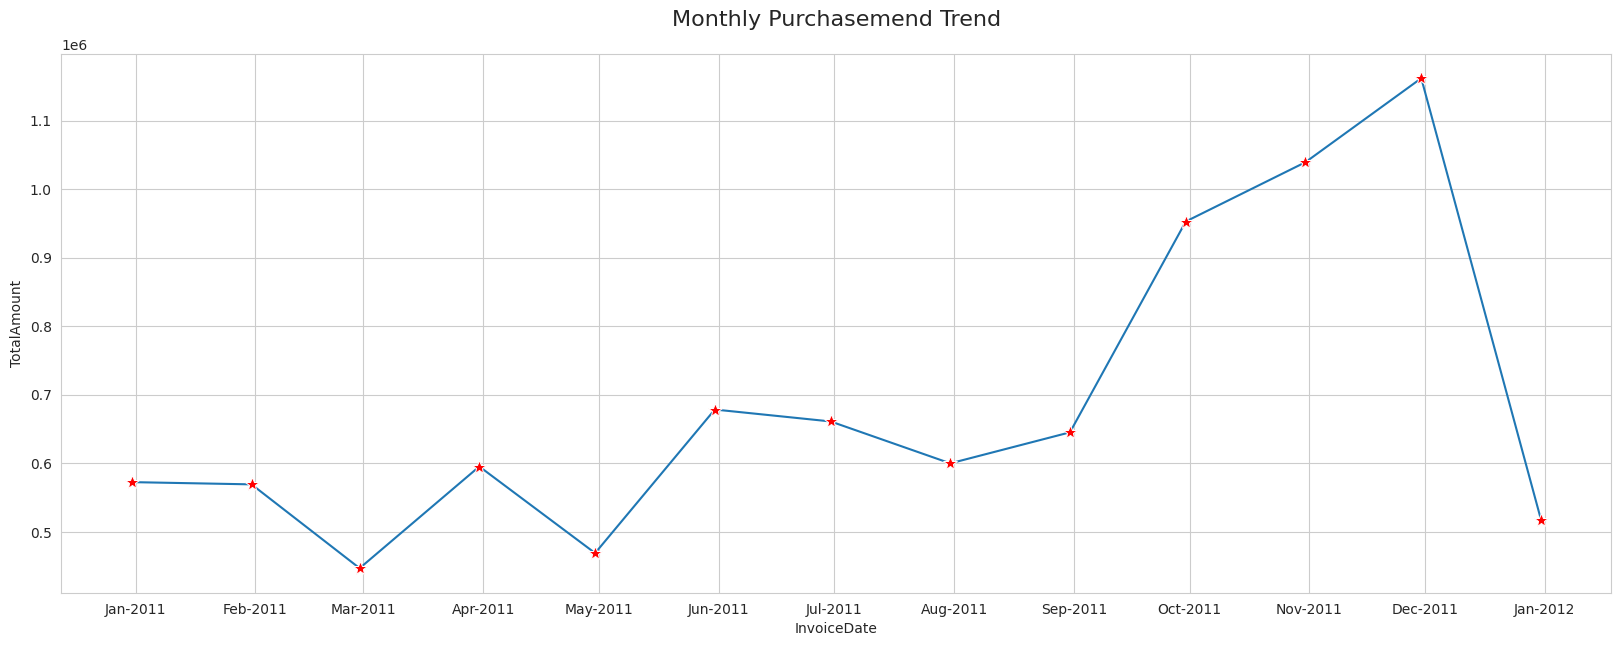

In [25]:
plotPurchasementTrend(frequency= '1M', linetitle='Monthly Purchasemend Trend')

Based on the picture above, it can be seen that there was an increase in total purchases at the end of the year.

# Recency, Frequency, & Monetary Analysis

In this project, we would segment the customers using customer's demography and purchasement behavior. To explain the customer's demography, we could use `Country` column while to explain the customer's purchasement behavior we have to transform our data first to get those information. We could use RFM analysis to get those information.

## Recency Analysis

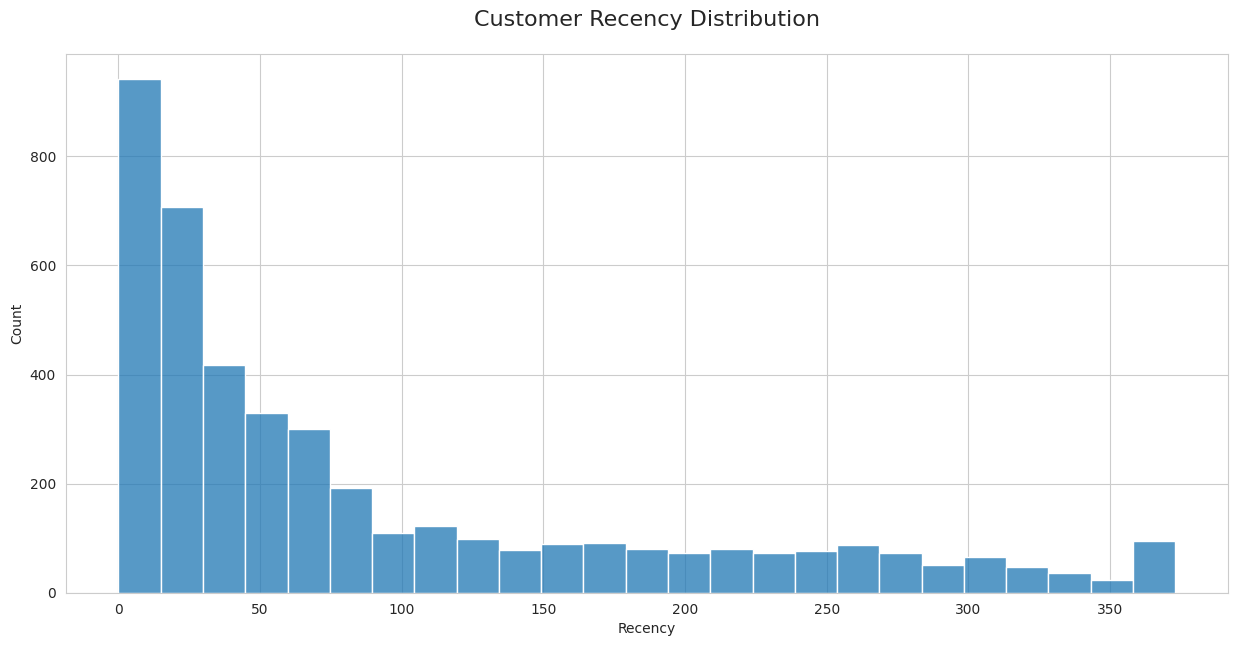

In [26]:
# Extract Recency
recency= df.groupby('CustomerID')['InvoiceDate'].max()
recency= recency.max()-recency

# Get Days Mumber
recency= recency.dt.days

# Plot Graph
fig, ax= plt.subplots(figsize=(15,7))
plt.title(
    'Customer Recency Distribution',
    fontdict= {'fontsize':16},
    pad=20
)

ax= (
    sns.histplot(recency),
    ax.set(xlabel='Recency')
)

## Frequency Analysis

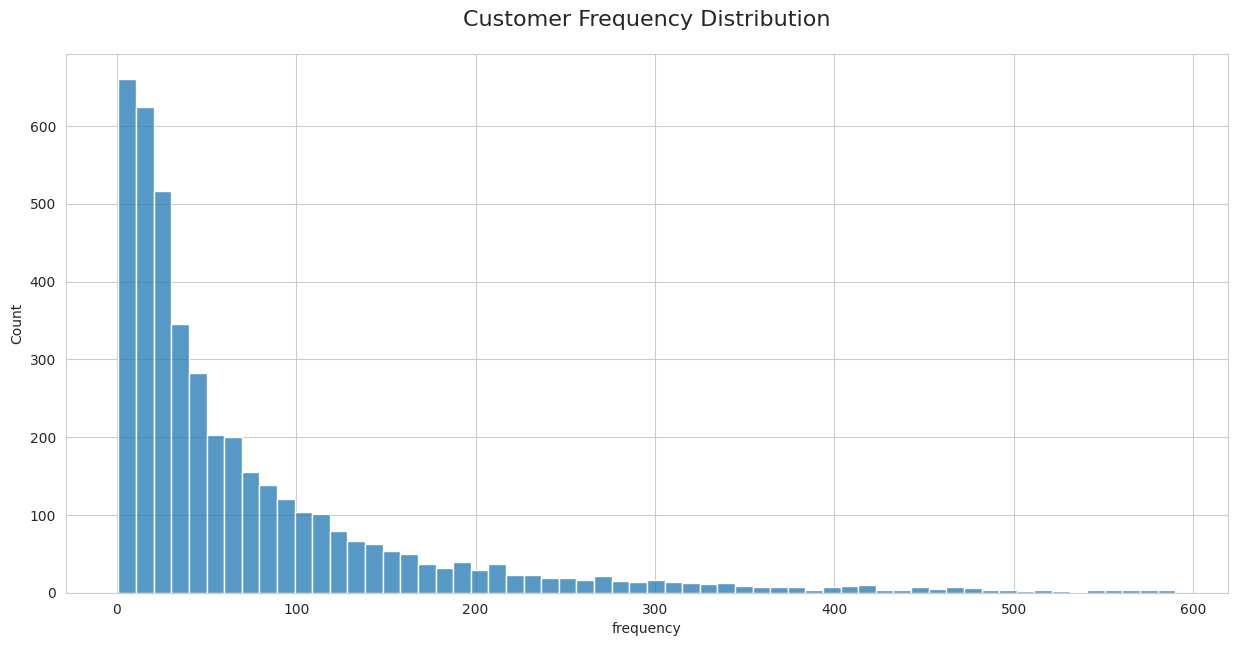

In [27]:
frequency= df.groupby('CustomerID')['InvoiceDate'].count()

# Plot Graph
fig, ax= plt.subplots(figsize=(15,7))
plt.title(
    'Customer Frequency Distribution',
    fontdict= {'fontsize':16},
    pad=20
)

ax= (
    sns.histplot(frequency[frequency < 600]),
    ax.set(xlabel='frequency')
)

## Monetary Analysis

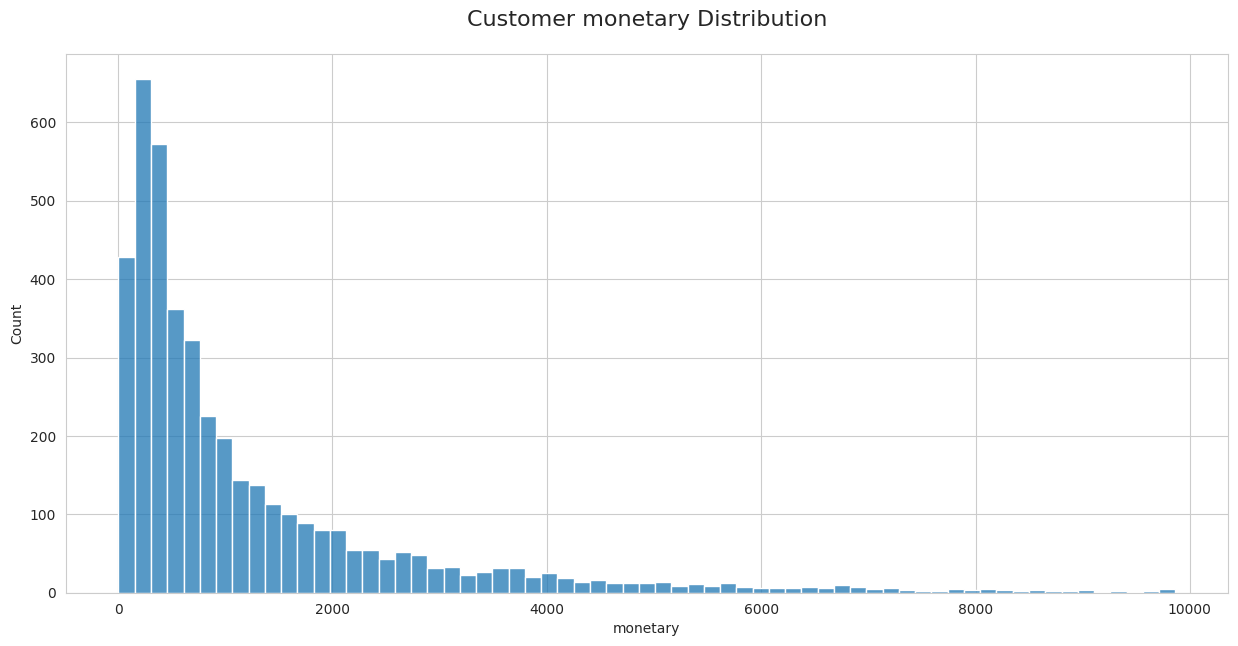

In [28]:
monetary= df.groupby('CustomerID')['TotalAmount'].sum()

# Plot Graph
fig, ax= plt.subplots(figsize=(15,7))
plt.title(
    'Customer monetary Distribution',
    fontdict= {'fontsize': 16},
    pad=20
)

ax= (
    sns.histplot(monetary[monetary < 10000]),
    ax.set(xlabel='monetary')
)

# Merge Data

In [29]:
# Grouping by country
country= df.groupby(['CustomerID','Country_isUK'], as_index=False).size().drop('size', axis=1)

# Merging Data
df_new= (
    country
    .merge(recency, on='CustomerID')
    .merge(frequency, on='CustomerID')
    .merge(monetary, on='CustomerID')
)

# Set CustomerID as index
df_new = df_new.set_index('CustomerID')
df_new.head()

,Country_isUK,InvoiceDate_x,InvoiceDate_y,TotalAmount
CustomerID,,,,
12346.0,UK,325,1,77183.60
12347.0,Non UK,1,182,4310.00
12348.0,Non UK,74,31,1797.24
12349.0,Non UK,18,73,1757.55
12350.0,Non UK,309,17,334.40


In [30]:
df_new.rename({
    'InvoiceDate_x': 'Recency',
    'InvoiceDate_y': 'Frequency',
    'TotalAmount': 'Monetary'
}, axis=1, inplace=True)

In [31]:
df_new.head()

,Country_isUK,Recency,Frequency,Monetary
CustomerID,,,,
12346.0,UK,325,1,77183.60
12347.0,Non UK,1,182,4310.00
12348.0,Non UK,74,31,1797.24
12349.0,Non UK,18,73,1757.55
12350.0,Non UK,309,17,334.40


# One Hot Encoding

In [32]:
# Recode the non numeric variable

df_new = pd.get_dummies(
    df_new,
    columns=['Country_isUK'],
    drop_first=True
)

df_new = df_new.rename(
    columns={'Country_isUK_UK': 'Country_UK'}
)

df_new.head()

,Recency,Frequency,Monetary,Country_UK
CustomerID,,,,
12346.0,325,1,77183.60,1
12347.0,1,182,4310.00,0
12348.0,74,31,1797.24,0
12349.0,18,73,1757.55,0
12350.0,309,17,334.40,0


# Scalling

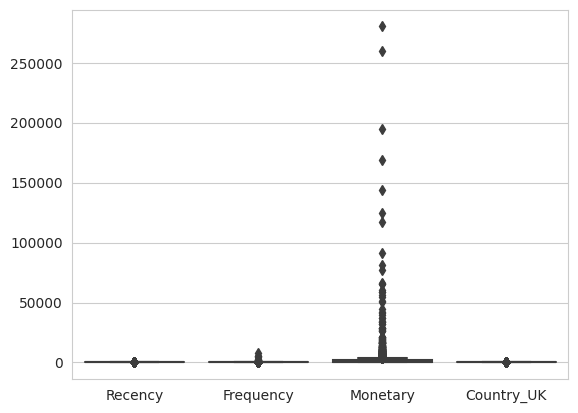

In [33]:
sns.boxplot(data=df_new)
plt.show()

In [34]:
scaler= StandardScaler()
df_scaled= pd.DataFrame(
    scaler.fit_transform(df_new),
    columns=df_new.columns,
    index=df_new.index
)
df_scaled.head()

,Recency,Frequency,Monetary,Country_UK
CustomerID,,,,
12346.0,2.334574,-0.396578,8.358668,0.326547
12347.0,-0.905340,0.394649,0.250966,-3.062350
12348.0,-0.175360,-0.265435,-0.028596,-3.062350
12349.0,-0.735345,-0.081836,-0.033012,-3.062350
12350.0,2.174578,-0.326635,-0.191347,-3.062350


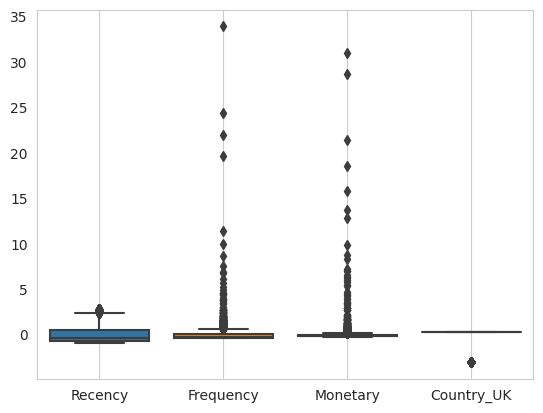

In [35]:
# Plot scaled data
sns.boxplot(data = df_scaled)
plt.grid()
plt.show()

# Modelling

In [36]:
possible_k = [2, 3, 4, 5, 6, 7, 8]
silhouette = []

for k in possible_k:
    kmeans= KMeans(n_clusters=k, random_state=42).fit(df_scaled)
    silhouette.append(silhouette_score(X=df_scaled, labels=kmeans.labels_))

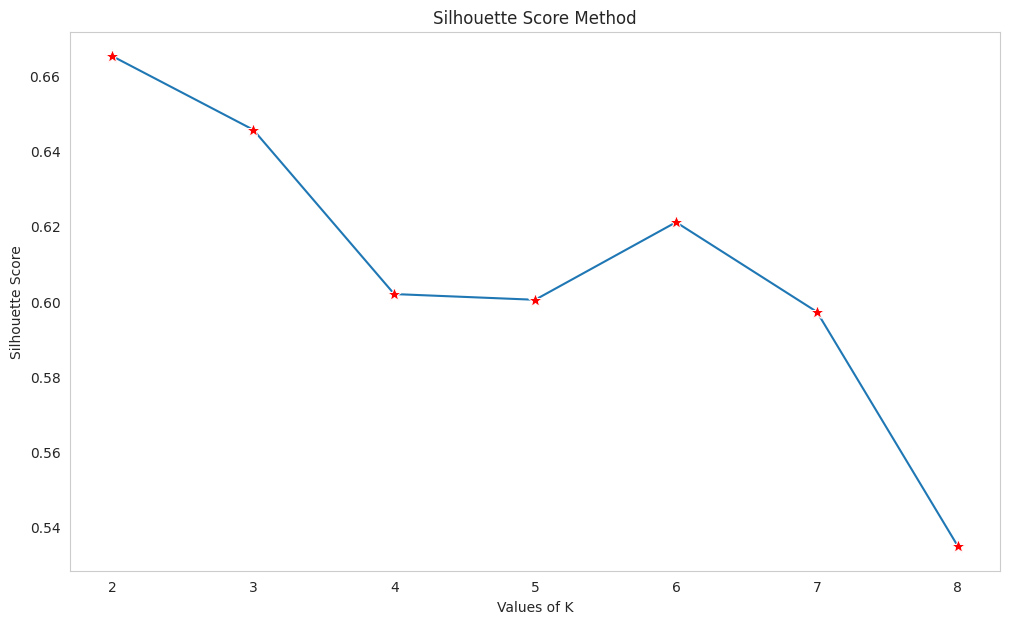

In [37]:
# Plot the score
plt.figure(figsize=(12, 7))
sns.lineplot(
    x=possible_k,
    y=silhouette,
    marker='*',
    markersize=10,
    markerfacecolor='red'
)
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.grid()
plt.show();

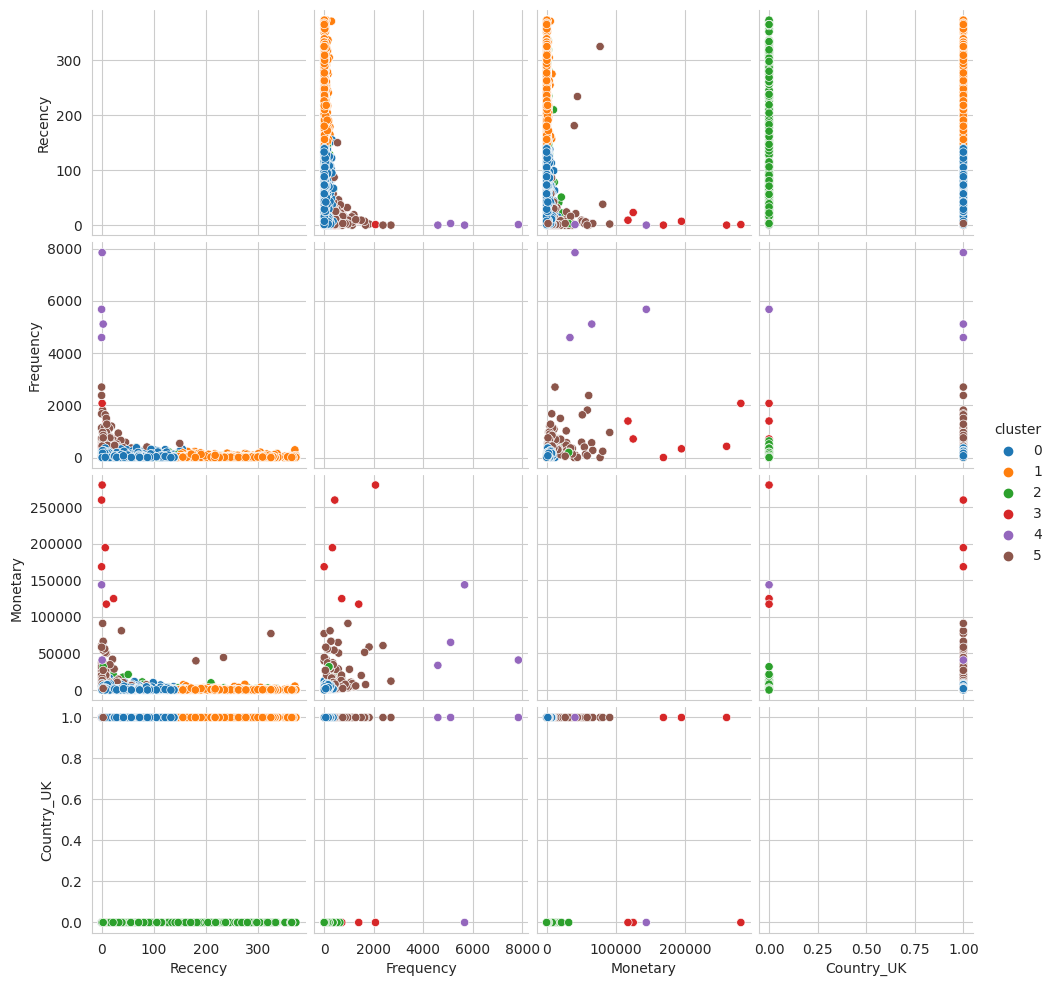

In [38]:
kmeans = KMeans(n_clusters=6, random_state=42).fit(df_scaled)

df_result_kmeans = df_new.copy()
df_result_kmeans['cluster'] = kmeans.labels_

sns.pairplot(
    data=df_result_kmeans,
    hue='cluster',
    diag_kind='None',
    palette='tab10'
)

plt.show();

In [39]:
# Quantile function
def q25(x):
    return x.quantile(0.25)

def q75(x):
    return x.quantile(0.75)

# Simple descriptive statistic
(
    df_result_kmeans
    .drop("Country_UK", axis = 1)
    .groupby('cluster')
    .aggregate(['mean', 'std', 'min', q25, 'median', q75, 'max'])
    .transpose()
)

cluster                      0            1             2              3  \
Recency   mean       42.676884   246.776618     95.405797       6.666667   
          std        36.313016    65.636727    104.638705       8.869423   
          min         0.000000   143.000000      0.000000       0.000000   
          q25        14.000000   189.000000     18.000000       0.250000   
          median     31.000000   242.000000     52.000000       4.000000   
          q75        64.000000   296.000000    136.500000       8.500000   
          max       155.000000   373.000000    373.000000      23.000000   
Frequency mean       76.270826    27.689979     81.396135     826.833333   
          std        74.030983    32.176026     96.304061     771.620481   
          min         1.000000     1.000000      1.000000       3.000000   
          q25        22.000000     8.250000     21.250000     360.500000   
          median     51.000000    18.000000     45.000000     572.500000   
          q75       107.000000    33.000000    101.000000    1228.500000   
          max       385.000000   297.000000    638.000000    2076.000000   
Monetary  mean     1341.293935   450.793070   2262.538913  190863.461667   
          std      1592.871914   610.367153   3479.689136   67791.993010   
          min         6.200000     3.750000     51.560000  117379.630000   
          q25       371.700000   163.225000    459.650000  135804.022500   
          median    795.120000   305.515000   1025.700000  181511.645000   
          q75      1720.300000   505.542500   2659.962500  243380.672500   
          max     17654.540000  7832.470000  31906.820000  280206.020000   

cluster                       4             5  
Recency   mean         1.000000     15.234973  
          std          1.414214     35.305176  
          min          0.000000      0.000000  
          q25          0.000000      2.000000  
          median       0.500000      6.000000  
          q75          1.500000     16.000000  
          max          3.000000    325.000000  
Frequency mean      5807.000000    535.360656  
          std       1429.730044    358.078267  
          min       4595.000000      1.000000  
          q25       4982.000000    367.000000  
          median    5393.000000    450.000000  
          q75       6218.000000    589.500000  
          max       7847.000000   2700.000000  
Monetary  mean     70925.287500  13085.065738  
          std      50424.336433  16313.461152  
          min      33719.730000   1093.650000  
          q25      39173.610000   4014.945000  
          median   53078.180000   6923.130000  
          q75      84829.857500  13213.210000  
          max     143825.060000  91062.380000

In [42]:
def rq(recency_score):
  if recency_score < 17:
    return "High_R"
  elif 17 <= recency_score < 50:
    return "Medium_R"
  elif 50 <= recency_score < 141:
    return "Low_R"
  else:
    return "Bad_R"

df_result_kmeans["Recency_Quality"] = df_result_kmeans['Recency'].apply(rq)
df_result_kmeans.head(10)

,Recency,Frequency,Monetary,Country_UK,cluster,Recency_Quality
CustomerID,,,,,,
12346.0,325,1,77183.60,1,5,Bad_R
12347.0,1,182,4310.00,0,2,High_R
12348.0,74,31,1797.24,0,2,Low_R
12349.0,18,73,1757.55,0,2,Medium_R
12350.0,309,17,334.40,0,2,Bad_R
12352.0,35,85,2506.04,0,2,Medium_R
12353.0,203,4,89.00,0,2,Bad_R
12354.0,231,58,1079.40,0,2,Bad_R
12355.0,213,13,459.40,0,2,Bad_R
